In [2]:
# read graph

import numpy as np
import networkx as nx

N = np.genfromtxt('Wisconsin_SAFEGRAPH_travel_numbers.csv', delimiter=',')
for i in range(len(N)):
    for j in range(len(N)):
        if N[i,j] <= 20:
            N[i,j] = 0
G = nx.convert_matrix.from_numpy_matrix(N)

In [3]:
# read positions

import pandas as pd

pos_df = pd.read_csv('wisconsin_GIS_data.csv')
pos = {}

for i in range(len(pos_df)):
    pos[i] = (pos_df.iloc[i].Lon, pos_df.iloc[i].Lat)


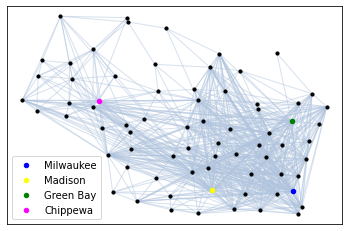

In [12]:
#pos = nx.kamada_kawai_layout(G)
#pos = 
import matplotlib.pyplot as plt

nx.draw_networkx_nodes(G, pos, nodelist=list(G.nodes()), node_size=10, node_color="black")
nx.draw_networkx_nodes(G, pos, nodelist=[40], node_size=20, node_color="blue", label="Milwaukee")
nx.draw_networkx_nodes(G, pos, nodelist=[12], node_size=20, node_color="yellow", label="Madison")
nx.draw_networkx_nodes(G, pos, nodelist=[4], node_size=20, node_color="green", label="Green Bay")
nx.draw_networkx_nodes(G, pos, nodelist=[8], node_size=20, node_color="magenta", label="Chippewa")
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color="lightsteelblue")


plt.legend(loc='lower left')
plt.savefig('wisconsin.png', dpi=300)

In [148]:
# try patterns
from opt import *

mu = 0.004297432
h_max = -1
J = N * np.log(1 / (1 - mu))
h = h_max * np.ones(len(N))
for i in [4, 8, 12, 40]:
    result0 = gurobi_map_explicit(J, h, [i])
    print("node: ", i, "infected: ", sum(result0))

node:  4 infected:  4.0
node:  8 infected:  1.0
node:  12 infected:  65.0
node:  40 infected:  65.0


In [114]:
mu = 0.011926933
h_max = -1
J = N * np.log(1 / (1 - mu))
h = h_max * np.ones(len(N))
for i in [4, 8, 12, 40]:
    result = gurobi_map_explicit(J, h, [i])
    print("node: ", i, "infected: ", sum(result))

node:  4 infected:  71.0
node:  8 infected:  71.0
node:  12 infected:  71.0
node:  40 infected:  71.0


In [64]:
mu = 0.002517749
h_max = -1
J = N * np.log(1 / (1 - mu))
h = h_max * np.ones(len(N))
for i in [4, 8, 12, 40]:
    result = gurobi_map_explicit(J, h, [i])
    
    infected = [node for node in range(len(result)) if (result[node] > 0.5) and (node != i)]
    
    nx.draw_networkx_nodes(G, pos, nodelist=list(G.nodes()), node_size=10, node_color="green", label="Healthy")
    nx.draw_networkx_nodes(G, pos, nodelist=[i], node_size=20, node_color="yellow", label="Event")
    nx.draw_networkx_nodes(G, pos, nodelist=infected, node_size=20, node_color="red", label="Infected")
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color="lightsteelblue")


    plt.legend(loc='lower left')
    plt.savefig('wisconsin_infected={}_mu={}.png'.format(i, mu), dpi=300)
    plt.clf()
    

<Figure size 432x288 with 0 Axes>

In [150]:
mu = 0.004297433
h_max = -1
J = N * np.log(1 / (1 - mu))
h = h_max * np.ones(len(N))
for i in [4]:
    result = gurobi_map_explicit(J, h, [i])
    
    infected = [node for node in range(len(result)) if (result[node] > 0.5) and (node != i)]
    
    nx.draw_networkx_nodes(G, pos, nodelist=list(G.nodes()), node_size=10, node_color="green", label="Healthy")
    nx.draw_networkx_nodes(G, pos, nodelist=[i], node_size=20, node_color="yellow", label="Event")
    nx.draw_networkx_nodes(G, pos, nodelist=infected, node_size=20, node_color="red", label="Infected")
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color="lightsteelblue")


    plt.legend(loc='lower left')
    plt.savefig('wisconsin_infected={}_mu={}.png'.format(i, mu), dpi=300)
    plt.clf()

<Figure size 432x288 with 0 Axes>